# Using Jupyter AI

Jupyter AI is an official extension of JupyterLab that offers an interface to exisiting large language models (LLMs). It is not an LLM itself, but a way to bring the power of generative AI tools to Jupyter.

Documentation can be found at https://jupyter-ai.readthedocs.io/ (including how to install the library).

As of summer 2023, the [GW JupyterHub](http://go.gwu.edu/jupyter) already has installed the `jupyter_ai` library. To use it, you need to combine it with an AI model from one of the various providers: OpenAI, Anthropic, etc. 
(If you don't have access to an institutional JupyterHub, you can install Jupyter AI in your local machine according to the documentation.)

Most AI model providers have an associated Python package, and can be accessed via an API key. This allows you to interact with their models programmatically, either from a Python program or in a Jupyter notebook. 
For example, to use OpenAI models, we can use the `openai` Python package, and need to set the `OPENAI_AI_KEY` environment variable. You generate this key within your OpenAI account, and will be charged for use at the current [pricing](https://openai.com/pricing)—e.g., with the `gpt-3.5-turbo` model, you pay $0.002 for 1,000 tokens (about 750 words). (New users get some free credits.)

With the Jupyter AI extension, you can access language models without having to directly use their associated Python package. You still need to set the API key environment variable, however.
To set an environment variable within a Jupyter notebook, you can use the `os` Python module. The syntax is:

```python
import os
os.environ['MY_VARIABLE'] = 'my_value'
```

Note that the environment variable will only be set for the current session of the notebook. Once the notebook and its associated kernel are restarted, the environment variable will be reset.

It's also a good idea to delete the cell after executing it, to protect your credentials.

In [1]:
import os
os.environ['OPENAI_API_KEY'] = 'deleted' #DELETE!!!

## Jupyter AI chat interface

With the extension installed, you get a native chat interface right in JupyterLab. Open it by clicking the "chat" icon on the sidebar. It looks like this:

![](chat_icon.png)

You select the model to use and add your API key in the settings (gear icon), then click the Back link (left arrow) to get back to the chat interface. Now you can write in the "Ask Jupyternaut" text box, and that will be sent as a prompt to your chosen LLM. If you select some code or text in your open Jupyter notebook, it can be included in the prompt!  

Find out more in the [documentation](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#the-chat-interface).

## Jupyter AI Magics

Interacting with the language model via the chat interface allows you to ask questions, get explanations and sample code, work through errors, and so on. Jupyter AI also gives you the power to prompt your chosen LLM from a notebook cell, using _magics_.

_Magics_ in Jupyter are special commands. There are two types:

- line magics, using an `%` before them
- cell magics, using `%%`, the command name, and subsequent lines

Most AI products offer online "playgrounds," like the [OpenAI platform](https://platform.openai.com/), or a web interface, like [ChatGPT](https://chat.openai.com/) and [Claude](https://claude.ai/). With Jupyter AI magics you can bring the AI model into a programmatic environment, which means you can document, and share with others, your AI-supported workflow. 

The following command loads the Jupyter AI extension (once installed), so you can use Jupyter AI within the notebook interface itself.

In [2]:
%load_ext jupyter_ai

Now you can use the `%ai` line magic and the `%%ai` cell magic to run the Jupyter AI special commands in code cells. Use the following syntax to send a prompt to your chosen model:

```python
%%ai <provider-id>:<model-id>
Extended text containing your prompt.
```

To print the list of available [providers and models](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#choosing-a-provider-and-model), you can use the `%ai list` line magic command. For example, for OpenAI's GPT-3.5-turbo model, use: `%ai openai-chat:gpt-3.5-turbo`. 

The output of the model will be formatted in Markdown by default.

Here's an example:

In [3]:
%%ai openai-chat:gpt-3.5-turbo
What is the linear advection equation?
Show me the equation using LaTeX, delimited by `$`, then explain each 
term's physical meaning.

The linear advection equation is a partial differential equation that describes the transport of a quantity through a medium. It is commonly used in fluid dynamics, meteorology, and other fields to model the propagation of wave-like phenomena.

The equation can be written as:

$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0$$

where:
- $\frac{\partial u}{\partial t}$ represents the rate of change of the quantity $u$ with respect to time $t$. It describes how the quantity is changing over time.
- $\frac{\partial u}{\partial x}$ represents the rate of change of the quantity $u$ with respect to the spatial coordinate $x$. It describes how the quantity is changing as it moves in the spatial dimension.
- $c$ is the advection speed or velocity of the quantity $u$. It determines how fast the quantity is propagating through the medium.

In physical terms, this equation states that the change in the quantity $u$ with time is balanced by the advection of $u$ due to the velocity $c$ in the spatial dimension. In other words, the equation asserts that the rate of change of $u$ at a given point in space is equal to the rate of change of $u$ as it moves in that direction. This implies that the quantity $u$ moves with a constant speed $c$ without being distorted or modified in any way.

The linear advection equation is a basic model that provides insights into the behavior of wave-like phenomena and their propagation in a medium. It serves as a building block for more complex and realistic equations in fluid dynamics and other fields.

In [4]:
%%ai openai-chat:gpt-3.5-turbo
Write Python code to solve the linear advection equation
using Euler's method for time, and a backward difference 
scheme for the space variable.
Use a step function as initial condition.

```python
import numpy as np
import matplotlib.pyplot as plt

def step_func(x, x0, width):
    """
    Step function for initial condition
    """
    return np.where((x >= x0) & (x <= x0 + width), 1, 0)

def linear_advection(n_x, n_t, x_max, t_max, c):
    """
    Solve the linear advection equation using Euler's method for time
    and a backward difference scheme for the space variable.
    
    Parameters:
    - n_x (int): number of grid points in space
    - n_t (int): number of time steps
    - x_max (float): maximum x value
    - t_max (float): maximum t value
    - c (float): advection speed
    
    Returns:
    - x (ndarray): x grid
    - t (ndarray): t grid
    - u (ndarray): solution array
    """
    dx = x_max / (n_x - 1)
    dt = t_max / n_t
    
    x = np.linspace(0, x_max, n_x)
    t = np.linspace(0, t_max, n_t)
    u = np.zeros((n_t, n_x))
    
    # initial condition
    u[0] = step_func(x, x_max / 4, x_max / 10)
    
    for i in range(1, n_t):
        for j in range(1, n_x):
            u[i, j] = u[i-1, j-1] - c * dt / dx * (u[i-1, j] - u[i-1, j-1])
    
    return x, t, u

# Parameters
n_x = 100
n_t = 500
x_max = 1.0
t_max = 1.0
c = 1.0

# Solve linear advection equation
x, t, u = linear_advection(n_x, n_t, x_max, t_max, c)

# Plotting
plt.figure(figsize=(10, 6))
plt.pcolormesh(x, t, u, cmap='jet')
plt.colorbar(label='u')
plt.title('Solution to Linear Advection Equation')
plt.xlabel('x')
plt.ylabel('t')
plt.show()
```

The code above solves the linear advection equation using Euler's method for time and a backward difference scheme for the space variable. It defines a step function as the initial condition and uses numpy and matplotlib libraries.

The `step_func` function generates a step function for the initial condition. It takes the x grid, the position of the step (x0), and the width of the step as parameters. It returns an array with the same length as the x grid with values 1 where the step is located and 0 elsewhere.

The main function `linear_advection` takes the number of grid points (n_x, n_t) in space and time, the maximum x and t values (x_max, t_max), and the advection speed (c) as parameters. It initializes the x and t grids and the solution array (u) to zeros. It applies the initial condition using the `step_func` and then iterates over time and space to compute the solution using Euler's method and backward difference scheme. The computed solution is returned as x, t, and u.

Finally, the code sets the parameters for the linear advection equation and calls the `linear_advection` function. It then plots the solution using `plt.pcolormesh` and sets the color map to 'jet'. The resulting plot displays the solution to the linear advection equation as a function of x and t. The color bar on the right indicates the value of u. The x-axis represents the spatial domain, and the y-axis represents the temporal domain.

## Which to use: chat interface, or magics?

You could ask the same question above via the chat interface, and can get a similar answer (it will never be exactly the same). So which one should you use?

If you ask in the chat interface, you can click the "Copy to Clipboard" option, then paste in a code cell and execute. You may need to debug and correct the generated code—it's not guaranteed to be correct! You could also copy and paste from output generated via an `%%ai` magic. 

The difference is that when you close your Jupyter session, the chat interactions are cleared, whereas any calls to an LLM via `%%ai` would be saved in your notebook. Thus, you might use the chat when you are in exploratory mode, or problem-solving assisted by AI, and use the magics when you want to document your work and possibly share it with others. 

Another difference: the chat interface has "memory," meaning a subsequent question or request will be answered by the model with the previous interactions as _context_. In general, calls to a model from a code cell using `%%ai` are "one-shot" prompts, meaning each one is independent. The exception is the `openai-chat` provider, which adds to requests the previous prompts as context. 

##### _Example:_

Using _in the chat_ the same prompt above requesting a Python code to solve the linear advection equation gives a similar output. Following up with a request to: "Turn the double for-loop in the code above into vectorized NumPy code using array slicing" gave a modified code as follows:

```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1       # Length of the domain
T = 1       # Total time
N = 100     # Number of spatial grid points
M = 100     # Number of time steps
c = 1       # Advection velocity
dx = L / N  # Spatial step size
dt = T / M  # Time step size

# Initialize the solution array
u = np.zeros((M+1, N+1))

# Set the initial condition (step function)
u[0, :] = np.where(np.abs(np.linspace(0, L, N+1) - 0.5) <= 0.25, 1, 0)

# Apply the backward difference scheme (vectorized)
for i in range(M):
    u[i+1, 1:] = u[i, 1:] - c * dt / dx * (u[i, 1:] - u[i, :-1])

# Plot the solution
x = np.linspace(0, L, N+1)
t = np.linspace(0, T, M+1)
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()
```

In this case, I asked a follow-up question on the chat, referring to the previous model output, which was available as context to my request.

# Some advanced tricks

## Aliases

You can use shortcuts to call commonly used provider:model combinations. For example:

- `chatgpt` is alias for `openai-chat:gpt-3.5-turbo`
- `gpt4` is alias for `openai-chat:gpt-4`

Other aliases are listed at the end of the output of the command `%ai list`. You can create your own custom aliases using the `%ai register` command, followed by the alias, and the provider:model combination.

## Formatted output

You can request the output in other [formats](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#formatting-the-output) using the `--format` argument (shortcut: `-f`). For example, you can request typeset mathematics, or code, or HTML:

In [5]:
%%ai chatgpt --format math
Generate the central-difference approximation of the second derivative of $u$ with respect to $x$.
Do not include any text explanation.

<IPython.core.display.Math object>

In [6]:
%%ai chatgpt --format code
Generate the central-difference approximation of the second derivative of $u$ with respect to $x$.
Do not include any text explanation.

In [ ]:
u_xx = (u[i-1] - 2*u[i] + u[i+1]) / (dx*dx)

**Note:** Using the `code` format results in a new code cell being inserted below the output. Bear this in mind, as it may make your notebook unable to execute from top to bottom with "Rull All Cells."

In [8]:
%%ai openai-chat:gpt-3.5-turbo --format html
Generate one line of text with Times Roman at 20px that says "Warning" in red.
Below it, write a line of text, using grey 16pt Times that says: 
"You will be hooked with Jupyter AI."
Put a yellow line box around the two lines of text

## Include variable values in your prompt

You can use curly brackets, `{}`, with a variable name that will be replaced by its value on sending the prompt to the model. This uses _formatted string literals_ in IPython: a way to dynamically create strings that include variables and other Python expressions.
For example, define the string variable:

In [9]:
method = 'strip()'

Then you can ask one or more questions about the method `strip()` using the `method` string variable inside curly brackets. You could repeat the set of questions with another method by changing the value of the string variable, and re-executing the calls to the language model.

In [10]:
%%ai chatgpt
Give an example using the {method} method, and explain it.

Example:
```python
string = "   Hello, World!   "
print(string.strip())
```
Output:
```
Hello, World!
```

Explanation:
The `strip()` method is a built-in string method in Python that removes leading and trailing whitespaces (spaces, tabs, and newlines) from a string. In the example above, we have a string with leading and trailing spaces. By calling the `strip()` method on the string, these spaces are removed, and the resulting string is `"Hello, World!"`.

## Include inputs or outputs from your notebook

IPython saves the input and output history of your interactions in two lists: `In` and `Out`. If you want to retrieve the input of line 1, for example, you can access it via a formatted string with `{In[1]}`.

Say you experienced an error on executing input line `In[9]`. You can ask your LLM to explain the problem with your code using the prompt:

```
The code below is failing. What is wrong with it?
{In[9]}
```

Also, the variable `_i` always stores the number for the _previous_ input and `_` stores the number for the previous output. Read more about the [input and output caching system](https://ipython.readthedocs.io/en/stable/interactive/reference.html#input-caching-system) in the IPython documentation. Very useful indeed!

Jupyter AI captures errors in another list, called `Err` and indexed the same as `In` and `Out`. That way you can refer to a specific error message using formatted strings with `{Err[i]}`, where `i` is the index of the input line that gave you the error.

# Learn more

That's it for this lesson! Learn more about Jupyter AI by exploring the documentation and included [example notebooks](https://github.com/jupyterlab/jupyter-ai/tree/main/examples) in the repository, and by watching the talk from the PyData Seattle 2023 conference.

Since Jupyter AI was just released in Summer of 2023, you can expect updates and more talks to appear online at a rapid pace. Enjoy your learning journey!

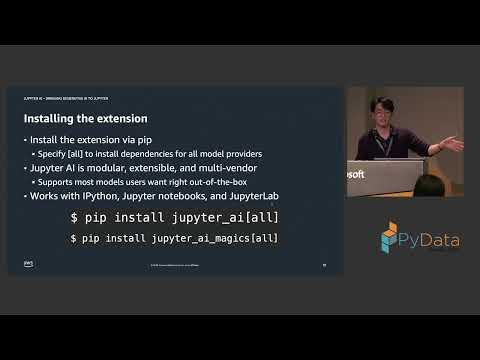

In [11]:
# David Qiu - Jupyter AI — Bringing Generative AI to Jupyter | PyData Seattle 2023
from IPython.display import YouTubeVideo
YouTubeVideo('T0rzH_KslKQ')

In [2]:
from IPython.core.display import HTML
style_file = '../style/custom.css'
HTML(open(style_file, "r").read())